In [44]:
from core.gradient_descent import wolfe_conditions_search, point_number_terminate_condition, fixed_step_search
%load_ext autoreload
%autoreload 2

from core.high_order_optimization import *
from core.optimizer_evaluator import *
from core.utils import *
from core.visualizer import *
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
f1 = lambda x: np.exp(x[0])
f2 = lambda x: np.sin(x[0])
f3 = lambda x: np.exp(-(x[0] + 1))
fs = [f1, f2, f3]

df1 = lambda x: np.array([np.exp(x[0])])
df2 = lambda x: np.array([np.cos(x[0])])
df3 = lambda x: np.array([-np.exp(-(x[0] + 1))])
dfs = [df1, df2, df3]

x0 = np.array([10])

termination = lambda f, points: len(points) > 20

p1 = gauss_newton(fs, dfs, x0, termination)
p2 = gauss_newton_with_approx_grad(fs, x0, termination)

print(f"symbolic grad argmin = {p1[-1]}, approx grad argmin = {p2[-1]}")

symbolic grad argmin = [-0.30823297], approx grad argmin = [-0.3083785]


In [35]:
f1 = generate_positive_definite_quadratic_form(2, 10, random_orthonormal_basis)
f2 = generate_positive_definite_quadratic_form(2, 12, random_orthonormal_basis)

df1 = f1.gradient_function()
df2 = f2.gradient_function()

dogleg([f1, f2], [df1, df2], 10, wolfe_conditions_search(0.1, 0.9), np.array([-5.0, 5.0]), lambda f, ps: f(ps[-1]) < 1e-5)

sd step = [ 0.6746426  -0.73814454], current = [-5.  5.]
rho = 0.9400486851509245
trusted = 2
sd step = [ 1.35226729 -1.473558  ], current = [-4.3253574   4.26185546]
rho = 0.9028530610051766
trusted = 4
sd step = [ 2.72444055 -2.9287239 ], current = [-2.97309012  2.78829746]
rho = 15.786736445294656
trusted = 8
gn step
rho = 0.9375000000000001
trusted = 10
gn step
rho = 0.9375000000000001
trusted = 10
gn step
rho = 0.9375000000000001
trusted = 10


[array([-5.,  5.]),
 array([-4.3253574 ,  4.26185546]),
 array([-2.97309012,  2.78829746]),
 array([-0.24864957, -0.14042645]),
 array([-0.12432478, -0.07021322]),
 array([-0.06216239, -0.03510661]),
 array([-0.0310812 , -0.01755331])]

array([76, 28])

array([76., 28.])

array([[20,  4],
       [ 4,  4]])

array([[20.00000165,  3.99985822],
       [ 3.99985822,  3.99992928]])

# Метод Ньютона

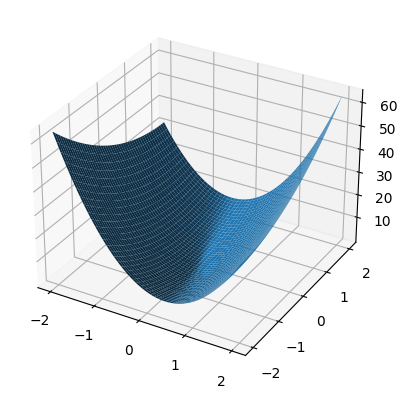

—————— 2 Dimensions ——————
[newton_optimize] Computed initial approximation
Best value found: x* = [-1.30923418e-09  8.72822784e-10] with f(x*) = 1.4093662825922414e-17
—————— Many Dimensions Rosenbrock ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 13
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 24
[newton_optimize] Computed initial approximation
Iterations until convergence for n=50: 84
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 158
—————— Many Dimensions && complicated ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 8
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 8
[newton_optimize] Computed initial approximation
Iterations until convergence for n=50: 8
—————— Many Dimensions ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for

KeyboardInterrupt: 

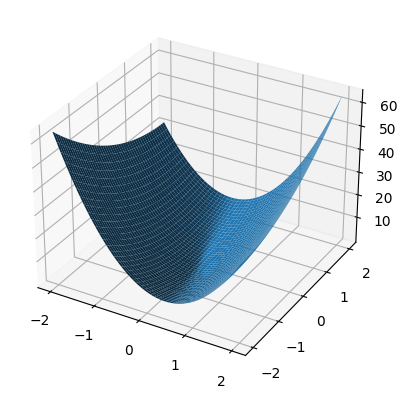

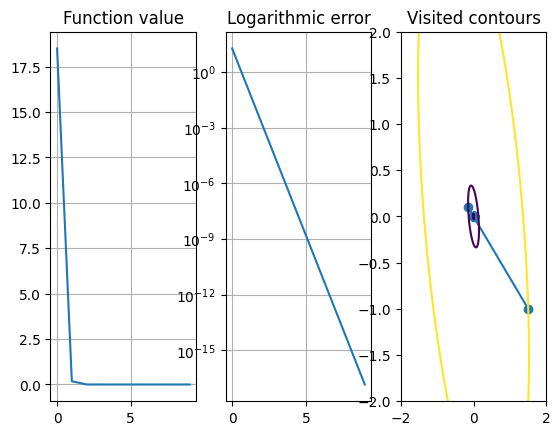

Достаточно ≈11 итераций для матрицы со сколь угодно большим числом обусловленности

In [180]:
form = generate_positive_definite_quadratic_form(100, 1000, random_orthonormal_basis)

In [56]:
points = newton_optimize(form, form.gradient_function(), GivenNewtonDirectionApproximator(lambda x: np.linalg.inv(form.hessian_function()(x))), random_normalized_vector(form.n), wolfe_conditions_search(0.1, 0.9),
                         precision_termination_condition)

Step length:  1.0985000000000003
Step length:  1.0985000000000003
Step length:  1.0985000000000003
Step length:  1.0985000000000003
Step length:  1.0985000000000003
Step length:  1.0985000000000003
Step length:  1.0985000000000003
Step length:  1.0985000000000003
Step length:  1.0985000000000003
Step length:  1.0985000000000003


In [57]:
len(points)

11

In [58]:
[form(p) for p in points]

[229.22110914382083,
 2.223960506190536,
 0.02157742082118648,
 0.00020934953116234515,
 2.0311614887198215e-06,
 1.9706836553931625e-08,
 1.9120065495537745e-10,
 1.8550765545407904e-12,
 1.7998416501292135e-14,
 1.7462513649965688e-16,
 1.6942567306037471e-18]

# BFGS

—————— 2 Dimensions ——————
[newton_optimize] Computed initial approximation
Best value found: x* = [-5.37975100e-07  8.52268362e-07] with f(x*) = 2.5128981740615738e-12
—————— Many Dimensions Rosenbrock ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 17
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 57
[newton_optimize] Computed initial approximation


AssertionError: 

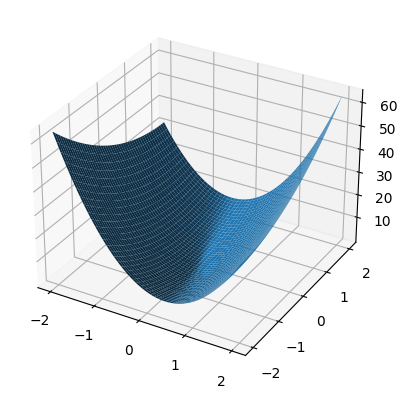

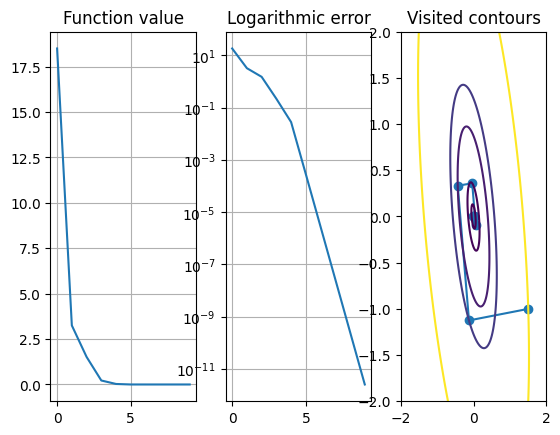

In [186]:
# visualize_optimizing_process(q, roi, np.array(newton_optimize(
#     q, q.gradient_function(), BFGSNewtonDirectionApproximator(),
#     np.array([1.5, -1.]), wolfe_conditions_search(0.1, 0.9), point_number_terminate_condition(10),
#     eye_initial_approximation
# )), 0);

evaluate_quasi_newton_method()

# LBFGS

None

—————— 2 Dimensions ——————
[newton_optimize] Computed initial approximation
Best value found: x* = [-0.0078125 -0.0703125] with f(x*) = 0.0126953125
—————— Many Dimensions Rosenbrock ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 4164
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 6782
[newton_optimize] Computed initial approximation
Iterations until convergence for n=50: 12656
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 19758
—————— Many Dimensions && complicated ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 36
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 36
[newton_optimize] Computed initial approximation


C:\Users\Vova\AppData\Local\Temp\ipykernel_13576\3103978692.py:34: RuntimeWarning: overflow encountered in exp
  multipiled = lambda x: form(x) * np.exp(sum(c**2 for c in x))


Iterations until convergence for n=50: 36
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 35
—————— Many Dimensions ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 2701
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 2628
[newton_optimize] Computed initial approximation
Iterations until convergence for n=1000: 2619
[newton_optimize] Computed initial approximation


KeyboardInterrupt: 

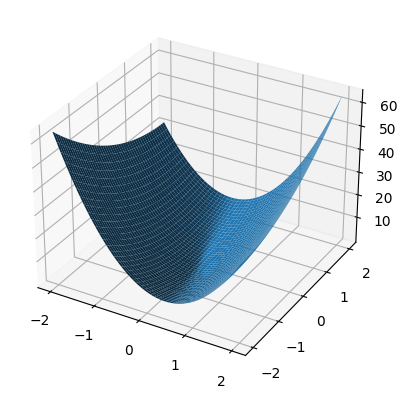

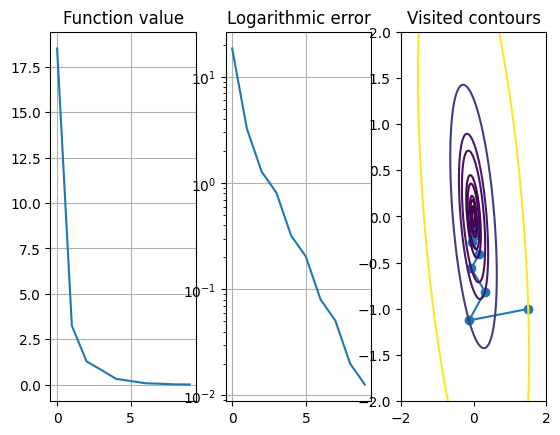

In [173]:
evaluate_quasi_newton_method()

m = 0

—————— 2 Dimensions ——————
[newton_optimize] Computed initial approximation
Best value found: x* = [ 3.90219439e-08 -2.99232287e-08] with f(x*) = 1.2347270099277023e-14
—————— Many Dimensions Rosenbrock ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 17
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 80
[newton_optimize] Computed initial approximation
Iterations until convergence for n=50: 455
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 975
—————— Many Dimensions && complicated ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 10
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 21
[newton_optimize] Computed initial approximation


C:\Users\Vova\AppData\Local\Temp\ipykernel_13576\2414492.py:34: RuntimeWarning: overflow encountered in exp
  multipiled = lambda x: form(x) * np.exp(sum(c**2 for c in x))


Iterations until convergence for n=50: 22
—————— Many Dimensions ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 42
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 128
[newton_optimize] Computed initial approximation
Iterations until convergence for n=1000: 165
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2000: 186


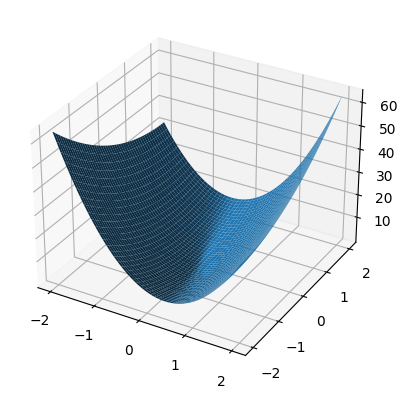

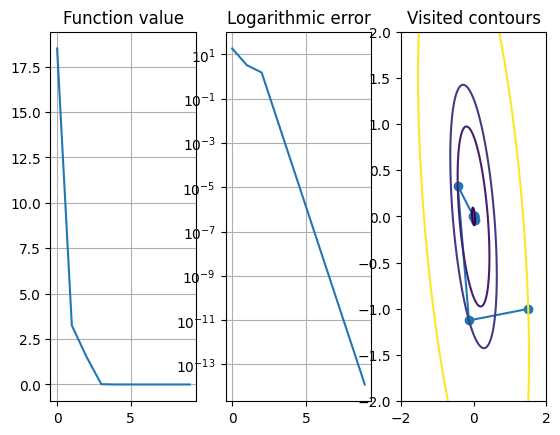

In [187]:
evaluate_quasi_newton_method(lambda f, g: LBFGSNewtonDirectionApproximator(3), lambda f, g: none_approximation)

—————— 2 Dimensions ——————
[newton_optimize] Computed initial approximation
Best value found: x* = [ 3.90219439e-08 -2.99232286e-08] with f(x*) = 1.2347270099276946e-14
—————— Many Dimensions Rosenbrock ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 16
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 110
[newton_optimize] Computed initial approximation
Iterations until convergence for n=50: 432
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 798
—————— Many Dimensions && complicated ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 10
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 27
[newton_optimize] Computed initial approximation


C:\Users\Vova\AppData\Local\Temp\ipykernel_13576\2414492.py:34: RuntimeWarning: overflow encountered in exp
  multipiled = lambda x: form(x) * np.exp(sum(c**2 for c in x))


Iterations until convergence for n=50: 54
—————— Many Dimensions ——————
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 25
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 100
[newton_optimize] Computed initial approximation
Iterations until convergence for n=1000: 141
[newton_optimize] Computed initial approximation
Iterations until convergence for n=2000: 139


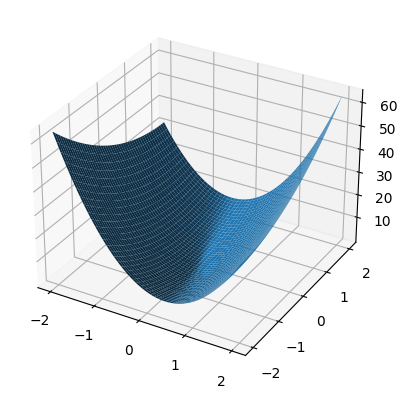

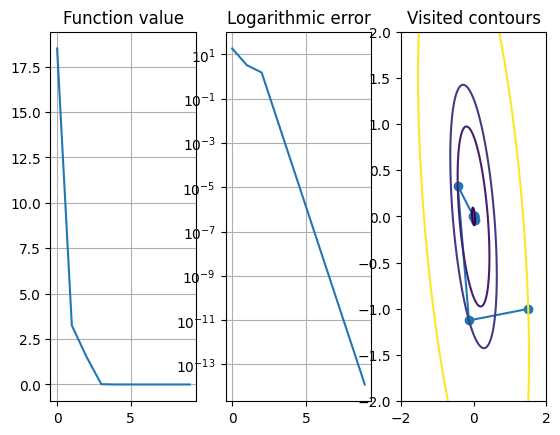

In [188]:
evaluate_quasi_newton_method(lambda f, g: LBFGSNewtonDirectionApproximator(10), lambda f, g: none_approximation)

In [ ]:
for n in [10, 50, 100, 200, 500, 1000]:
    form = generate_positive_definite_quadratic_form(n, 1000, random_orthonormal_basis)
    bfgs_points = newton_optimize(form, form.gradient_function(), LBFGSNewtonDirectionApproximator(5), random_normalized_vector(form.n), wolfe_conditions_search(0.1, 0.9),
                                  precision_termination_condition, none_approximation)
    print(f"Iterations until convergence for n={n}: {len(bfgs_points)}")

In [97]:
for n in [2, 10, 50, 100, 500]:
    form = generate_positive_definite_quadratic_form(n, 10, random_orthonormal_basis)
    multipiled = lambda x: form(x) * np.exp(sum(c**2 for c in x))
    bfgs_points = newton_optimize(multipiled, symmetric_gradient_computer(multipiled), LBFGSNewtonDirectionApproximator(3), random_normalized_vector(form.n),
                                  # wolfe_conditions_search(0.1, 0.9),
                                  fibonacci_search(30),
                                  # fixed_step_search(1),
                                  precision_termination_condition)
    print(f"Iterations until convergence for n={n}: {len(bfgs_points)}")

[newton_optimize] Computed initial approximation
Iterations until convergence for n=2: 9
[newton_optimize] Computed initial approximation
Iterations until convergence for n=10: 36
[newton_optimize] Computed initial approximation


C:\Users\Vova\AppData\Local\Temp\ipykernel_13576\2580497526.py:3: RuntimeWarning: overflow encountered in exp
  multipiled = lambda x: form(x) * np.exp(sum(c**2 for c in x))


Iterations until convergence for n=50: 42
[newton_optimize] Computed initial approximation
Iterations until convergence for n=100: 58
[newton_optimize] Computed initial approximation
Iterations until convergence for n=500: 58
